In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

: 

In [ ]:
horse=pd.read_csv("horsenew.csv")
horse

: 

In [9]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  int64  
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

In [10]:
horse.shape

(79447, 40)

In [11]:
max_race_id = horse['race_id'].max()

print(f"The maximum value of the race_id column is: {max_race_id}")

The maximum value of the race_id column is: 6348


In [12]:
horse.isnull().sum()

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
horse_gear             0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4              33221
time5              69368
time6              78151
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
date                   0
venue                  0
surface                0


In [13]:
horse.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id', 'date', 'venue', 'surface'],
      dtype='object')

In [14]:
columns_to_drop = ['position_sec4','position_sec5','position_sec6','behind_sec4','behind_sec5','behind_sec6','time4','time5','time6','place_odds']
horse = horse.drop(columns=columns_to_drop, axis=1)

In [15]:
horse.isnull().sum()

race_id            0
horse_no           0
horse_id           0
result             0
won                0
lengths_behind     0
horse_age          0
horse_country      2
horse_type         2
horse_rating       0
horse_gear         0
declared_weight    0
actual_weight      0
draw               0
position_sec1      0
position_sec2      0
position_sec3      0
behind_sec1        0
behind_sec2        0
behind_sec3        0
time1              0
time2              0
time3              0
finish_time        0
win_odds           0
trainer_id         0
jockey_id          0
date               0
venue              0
surface            0
dtype: int64

In [16]:
columns_to_check = ['horse_country','horse_type']

# Drop rows with null values in the specified column(s)
df_cleaned = horse.dropna(subset=columns_to_check,inplace=True)


In [17]:
horse.isnull().sum()

race_id            0
horse_no           0
horse_id           0
result             0
won                0
lengths_behind     0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
horse_gear         0
declared_weight    0
actual_weight      0
draw               0
position_sec1      0
position_sec2      0
position_sec3      0
behind_sec1        0
behind_sec2        0
behind_sec3        0
time1              0
time2              0
time3              0
finish_time        0
win_odds           0
trainer_id         0
jockey_id          0
date               0
venue              0
surface            0
dtype: int64

In [18]:
horse.head(10)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time1,time2,time3,finish_time,win_odds,trainer_id,jockey_id,date,venue,surface
0,0,1,3917,10,0,8.00,3,AUS,Gelding,60,...,13.85,21.59,23.86,83.92,9.7,118,2,02-06-1997,ST,0
1,0,2,2157,8,0,5.75,3,NZ,Gelding,60,...,14.57,21.99,23.30,83.56,16.0,164,57,02-06-1997,ST,0
2,0,3,858,7,0,4.75,3,NZ,Gelding,60,...,13.69,21.59,23.90,83.40,3.5,137,18,02-06-1997,ST,0
3,0,4,1853,9,0,6.25,3,SAF,Gelding,60,...,14.09,21.83,23.70,83.62,39.0,80,59,02-06-1997,ST,0
4,0,5,2796,6,0,3.75,3,GB,Gelding,60,...,14.77,21.75,23.22,83.24,50.0,9,154,02-06-1997,ST,0
5,0,6,3296,3,0,1.25,3,NZ,Gelding,60,...,14.33,22.03,22.90,82.83,7.0,54,34,02-06-1997,ST,0
6,0,7,911,12,0,9.50,3,NZ,Gelding,60,...,13.53,21.59,23.94,84.15,99.0,55,149,02-06-1997,ST,0
7,0,8,2170,1,1,0.00,3,AUS,Gelding,60,...,14.13,21.87,23.58,82.64,12.0,47,183,02-06-1997,ST,0
8,0,9,1730,13,0,9.75,3,NZ,Gelding,60,...,13.65,21.71,23.90,84.20,38.0,75,131,02-06-1997,ST,0
9,0,10,2998,14,0,999.00,3,AUS,Mare,60,...,15.05,22.31,24.38,92.20,39.0,109,145,02-06-1997,ST,0


In [19]:
horse.tail(10)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time1,time2,time3,finish_time,win_odds,trainer_id,jockey_id,date,venue,surface
79437,6348,5,3368,5,0,1.25,3,GER,Gelding,91,...,26.98,24.10,23.21,96.17,1.6,137,50,28-08-2005,ST,0
79438,6348,6,1793,12,0,4.75,4,AUS,Gelding,90,...,25.46,24.06,23.73,96.74,84.0,138,150,28-08-2005,ST,0
79439,6348,7,833,4,0,0.75,4,IRE,Gelding,89,...,25.82,23.98,23.65,96.07,36.0,7,91,28-08-2005,ST,0
79440,6348,8,932,3,0,0.50,5,AUS,Gelding,88,...,25.62,24.02,23.73,96.06,6.8,29,64,28-08-2005,ST,0
79441,6348,9,940,14,0,5.50,3,NZ,Gelding,86,...,26.78,24.06,23.45,96.83,57.0,75,2,28-08-2005,ST,0
79442,6348,10,1238,6,0,1.25,5,AUS,Gelding,87,...,26.14,23.98,23.53,96.17,99.0,73,40,28-08-2005,ST,0
79443,6348,11,985,7,0,2.25,5,NZ,Gelding,84,...,25.82,24.10,23.77,96.30,99.0,164,63,28-08-2005,ST,0
79444,6348,12,3147,10,0,3.00,5,NZ,Gelding,83,...,26.58,24.06,23.37,96.44,99.0,111,68,28-08-2005,ST,0
79445,6348,13,1982,8,0,2.50,3,AUS,Gelding,82,...,26.58,24.02,23.45,96.34,4.6,118,95,28-08-2005,ST,0
79446,6348,14,3491,11,0,4.25,3,IRE,Gelding,81,...,25.70,24.06,23.77,96.63,99.0,27,4,28-08-2005,ST,0


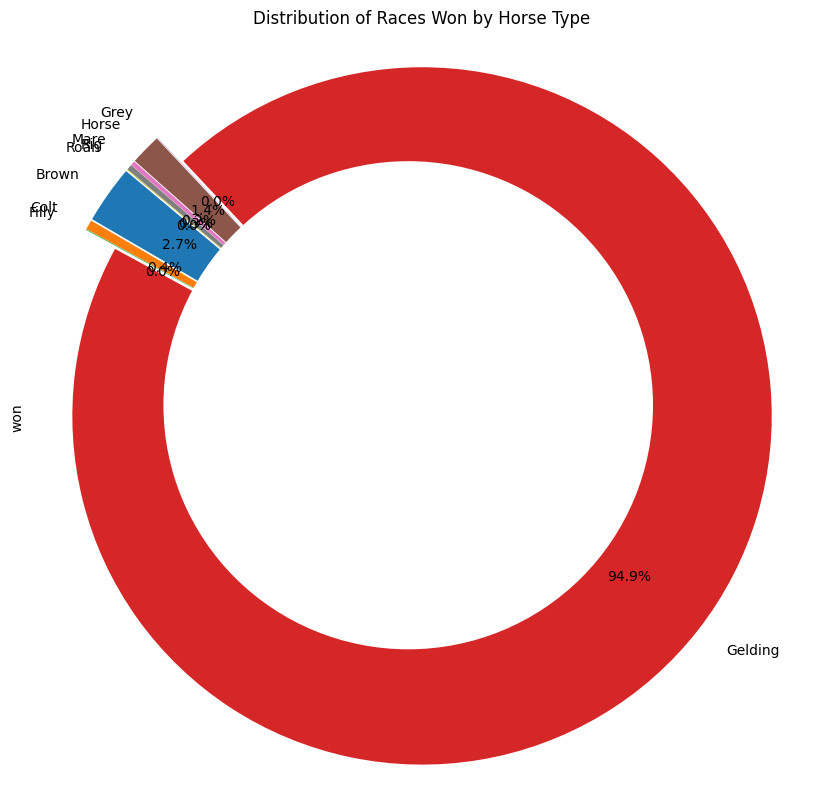

In [20]:
grouped_df = horse.groupby('horse_type')['won'].sum()

# Calculate the length of grouped_df
n_groups = len(grouped_df)

# Create an explode list with small values for each entry in grouped_df
explode_list = [0.05] * n_groups

# Set the figure size to give more room for the pie chart
plt.figure(figsize=(10, 10))

# Plotting the pie chart with labels and percentage display
grouped_df.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,  # Rotate the starting angle of the chart
    pctdistance=0.75,  # Adjust distance of percentages from the center
    labels=grouped_df.index,  # Use the grouped data index as labels
    explode=explode_list  # Explode slices slightly
)

# Add title
plt.title('Distribution of Races Won by Horse Type')

# Draw a circle at the center of the pie to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

In [21]:
# Define the column name as a string
horse_type = 'horse_type'  # Replace 'horse_type' with the actual name of the horse type column if it differs

# Get the unique values in the horse_type column
unique_horse_types = horse[horse_type].unique()

# Print the unique values
print(f"Unique values in the '{horse_type}' column:")
print(unique_horse_types)

Unique values in the 'horse_type' column:
['Gelding' 'Mare' 'Horse' 'Brown' 'Rig' 'Colt' 'Roan' 'Filly' 'Grey']


In [22]:
from sklearn.preprocessing import LabelEncoder

horse_type_column = 'horse_type'  # Replace 'horse_type' with the actual name of the horse type column in your dataset

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the horse type column to convert it from categorical to numerical values
horse[horse_type_column] = label_encoder.fit_transform(horse[horse_type_column])

# Display the first few rows of the updated DataFrame
print(horse.head())

# Optionally, you can print the mapping of original values to numerical values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Mapping of horse types to numerical values: {mapping}")

   race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
0        0         1      3917      10    0            8.00          3   
1        0         2      2157       8    0            5.75          3   
2        0         3       858       7    0            4.75          3   
3        0         4      1853       9    0            6.25          3   
4        0         5      2796       6    0            3.75          3   

  horse_country  horse_type  horse_rating  ...  time1  time2  time3  \
0           AUS           3            60  ...  13.85  21.59  23.86   
1            NZ           3            60  ...  14.57  21.99  23.30   
2            NZ           3            60  ...  13.69  21.59  23.90   
3           SAF           3            60  ...  14.09  21.83  23.70   
4            GB           3            60  ...  14.77  21.75  23.22   

   finish_time  win_odds  trainer_id  jockey_id        date  venue  surface  
0        83.92       9.7         118          2  0

In [25]:
horse_type_column = 'horse_type'  # Replace 'horse_type' with the actual name of the horse type column in your dataset

# Convert the horse type column from categorical to numerical values using LabelEncoder
label_encoder = LabelEncoder()
horse[horse_type_column] = label_encoder.fit_transform(horse[horse_type_column])

# Calculate the correlation matrix of the DataFrame
# Set numeric_only=True to calculate the correlation matrix only on numeric columns
correlation_matrix = horse.corr(numeric_only=True)

# Plot the heat map
plt.figure(figsize=(18, 16))  # Adjust the size of the heat map as needed

# Create a heat map with seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": 0.8}, linewidths=0.5)

# Set title and labels
plt.title('Correlation Heat Map', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the heat map
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [54]:
horse.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 79446
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79445 non-null  int64  
 1   horse_no         79445 non-null  int64  
 2   horse_id         79445 non-null  int64  
 3   result           79445 non-null  int64  
 4   won              79445 non-null  int64  
 5   lengths_behind   79445 non-null  float64
 6   horse_age        79445 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  int64  
 9   horse_rating     79445 non-null  int64  
 10  horse_gear       79445 non-null  object 
 11  declared_weight  79445 non-null  float64
 12  actual_weight    79445 non-null  int64  
 13  draw             79445 non-null  int64  
 14  position_sec1    79445 non-null  int64  
 15  position_sec2    79445 non-null  int64  
 16  position_sec3    79445 non-null  int64  
 17  behind_sec1 

In [26]:
import sklearn
print(sklearn.__version__)



1.0.2


In [27]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.impute import SimpleImputer


In [35]:
# ml_model.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('horsenew.csv')

# Define the target column and feature columns
target_column = 'won'
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

# Preprocess the data
X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.3f}')

# Save the trained model
import joblib
joblib.dump(model, 'horse_racing_model.joblib')

Model accuracy: 1.000


['horse_racing_model.joblib']

In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the new dataset
new_df = pd.read_csv('new_dataset.csv')

target_column = 'won'
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

# Preprocess the data
X_new= new_df[feature_columns]
y = new_df[target_column]

# Load the trained model
model = joblib.load('horse_racing_model.joblib')

# Make predictions on the new dataset
y_pred_new = model.predict(X_new)

# Assuming there's a target column in the new dataset, you can compare the predictions with the actual values
# For example:
new_y_true = new_df[target_column]  # Assuming 'target_column' is present in the new dataset

# Evaluate the model on the new dataset
accuracy_new = accuracy_score(new_y_true, y_pred_new)
print(f'Model accuracy on new dataset: {accuracy_new:.3f}')


Model accuracy on new dataset: 0.925


In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
df = pd.read_csv('horsenew.csv')

# Ensure the 'race_id' column is of type str
df['race_id'] = df['race_id'].astype(str)

# Convert the 'date' column to datetime datatype (specify the format)
df['date'] = pd.to_datetime(df['date'], format='%d%m%Y', errors='coerce')

# Drop rows with missing or incorrect dates
df.dropna(subset=['date'], inplace=True)

# Drop rows with missing values in the target column 'won'
df.dropna(subset=['won'], inplace=True)

# Define the target column and feature columns
target_column = 'won'
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

# Preprocess the data
X = df[feature_columns]
y = df[target_column]

# Train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Rest of the code remains the same

def predict_winner_race(race_id):
    race_data = df[df['race_id'] == race_id][feature_columns]
    
    if race_data.empty:
        return None, None
    
    race_probabilities = model.predict_proba(race_data)
    
    winning_probabilities = race_probabilities[:, 1]
    winning_horse_index = winning_probabilities.argmax()
    
    winning_horse_number = race_data.iloc[winning_horse_index]['horse_no']  # Get the horse number
    winning_probability = winning_probabilities[winning_horse_index] * 100  # Convert probability to percentage
    
    return winning_horse_number, winning_probability

# Select date
selected_date = input("Enter the date (DDMMYYYY): ")

# Convert the input date to datetime datatype
selected_date = pd.to_datetime(selected_date, format='%d%m%Y', errors='coerce')

# Filter race IDs happening on the selected date
race_ids_on_date = df[df['date'] == selected_date]['race_id'].unique()

if len(race_ids_on_date) == 0:
    print("No races found for the selected date.")
else:
    print("Race IDs happening on the selected date:")
    print(race_ids_on_date)
    
    # Select race ID
    selected_race_id = input("Enter the race ID from the above list: ")
    
    # Predict winner and winning probability
    winner_horse_number, winner_probability = predict_winner_race(selected_race_id)
    
    if winner_horse_number is not None:
        print(f'Predicted winner horse number for race ID {selected_race_id}: {winner_horse_number}, Winning Probability: {winner_probability:.2f}%')
    else:
        print("Race ID not found.")

# Save the trained model
joblib.dump(model, 'horse_racing_model.joblib')


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
df = pd.read_csv('horsenew.csv')

# Ensure the 'race_id' column is of type str
df['race_id'] = df['race_id'].astype(str)

# Convert the 'date' column to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%d%m%Y')

# Define the target column and feature columns
target_column = 'won'
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

# Preprocess the data
X = df[feature_columns]
y = df[target_column]

# Train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

def predict_winner_race(race_id):
    race_data = df[df['race_id'] == race_id][feature_columns]
    
    if race_data.empty:
        return None, None
    
    race_probabilities = model.predict_proba(race_data)
    
    winning_probabilities = race_probabilities[:, 1]
    winning_horse_index = winning_probabilities.argmax()
    
    winning_horse_number = race_data.iloc[winning_horse_index]['horse_no']  # Get the horse number
    winning_probability = winning_probabilities[winning_horse_index] * 100  # Convert probability to percentage
    
    return winning_horse_number, winning_probability

# Select date
selected_date = input("Enter the date (DDMMYYYY): ")

# Convert the input date to datetime datatype
selected_date = pd.to_datetime(selected_date, format='%d%m%Y')

# Filter race IDs happening on the selected date
race_ids_on_date = df[df['date'] == selected_date]['race_id'].unique()

if len(race_ids_on_date) == 0:
    print("No races found for the selected date.")
else:
    print("Race IDs happening on the selected date:")
    print(race_ids_on_date)
    
    # Select race ID
    selected_race_id = input("Enter the race ID from the above list: ")
    
    # Predict winner and winning probability
    winner_horse_number, winner_probability = predict_winner_race(selected_race_id)
    
    if winner_horse_number is not None:
        print(f'Predicted winner horse number for race ID {selected_race_id}: {winner_horse_number}, Winning Probability: {winner_probability:.2f}%')
    else:
        print("Race ID not found.")

# Save the trained model
joblib.dump(model, 'horse_racing_model.joblib')


ValueError: time data '02-06-1997' does not match format '%d%m%Y' (match)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
df = pd.read_csv('horsenew.csv')

# Ensure the 'race_id' column is of type str
df['race_id'] = df['race_id'].astype(str)

# Define the target column and feature columns
target_column = 'won'
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

# Preprocess the data
X = df[feature_columns]
y = df[target_column]

# Train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

def predict_winner_race(race_id):
    race_data = df[df['race_id'] == race_id][feature_columns]
    
    if race_data.empty:
        return None, None
    
    race_probabilities = model.predict_proba(race_data)
    
    winning_probabilities = race_probabilities[:, 1]
    winning_horse_index = winning_probabilities.argmax()
    
    winning_horse_number = race_data.iloc[winning_horse_index]['horse_no']  # Get the horse number
    winning_probability = winning_probabilities[winning_horse_index] * 100  # Convert probability to percentage
    
    return winning_horse_number, winning_probability

# Select date
selected_date = input("Enter the date (YYYY-MM-DD): ")

# Filter race IDs happening on the selected date
race_ids_on_date = df[df['date'] == selected_date]['race_id'].unique()

if len(race_ids_on_date) == 0:
    print("No races found for the selected date.")
else:
    print("Race IDs happening on the selected date:")
    print(race_ids_on_date)
    
    # Select race ID
    selected_race_id = input("Enter the race ID from the above list: ")
    
    # Predict winner and winning probability
    winner_horse_number, winner_probability = predict_winner_race(selected_race_id)
    
    if winner_horse_number is not None:
        print(f'Predicted winner horse number for race ID {selected_race_id}: {winner_horse_number}, Winning Probability: {winner_probability:.2f}%')
    else:
        print("Race ID not found.")

# Save the trained model
joblib.dump(model, 'horse_racing_model.joblib')


No races found for the selected date.


['horse_racing_model.joblib']

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the new dataset
new_df = pd.read_csv('new_dataset.csv')  # Update the file path as necessary

# Ensure the 'race_id' column is of type str
new_df['race_id'] = new_df['race_id'].astype(str)

# Load the trained model
model = joblib.load('horse_racing_model.joblib')

# Define the feature columns
feature_columns = ['behind_sec3', 'win_odds', 'position_sec1', 'position_sec2', 'position_sec3', 'result', 'horse_no']

def predict_winner_race_new(race_id):
    race_data = new_df[new_df['race_id'] == race_id][feature_columns]
    
    if race_data.empty:
        return None, None, None
    
    race_probabilities = model.predict_proba(race_data)
    
    winning_probabilities = race_probabilities[:, 1]
    winning_horse_index = winning_probabilities.argmax()
    
    winning_horse_id = race_data.index[winning_horse_index]  # Get the index of the winning horse
    winning_horse_number = race_data.iloc[winning_horse_index]['horse_no']  # Get the horse number
    winning_percentage = winning_probabilities[winning_horse_index] * 100  # Convert probability to percentage
    
    return winning_horse_id, winning_horse_number, winning_percentage

# Select date
selected_date = input("Enter the date (YYYY-MM-DD): ")

# Filter race IDs happening on the selected date
race_ids_on_date = new_df[new_df['date'] == selected_date]['race_id'].unique()

if len(race_ids_on_date) == 0:
    print("No races found for the selected date.")
else:
    print("Race IDs happening on the selected date:")
    print(race_ids_on_date)
    
    # Select race ID
    selected_race_id = input("Enter the race ID from the above list: ")
    
    # Predict winner and winning percentage
    winner_horse_id, winner_horse_number, winning_percentage = predict_winner_race_new(selected_race_id)
    
    if winner_horse_id is not None:
        print(f'Winner Horse Number: {winner_horse_number}, Winning Percentage: {winning_percentage:.2f}%')
    else:
        print("Race ID not found in the new dataset.")


No races found for the selected date.
